# Dimensionality Reduction Using a Principal Component Analysis

In order to analyze the DrugMatrix data, we will first explore it using dimensionality reduction and cluster analysis. This will allow us to represent the data in a two-dimensional space and find hidden relationships in the data.

### Principal Component Analysis

PCA reduces dimensionality by finding principal components. These are directions  of maximum variation in a dataset. This will allow us to reduce a dataset's original features to a set of new ones based on the principal components. In this way, we end up with the least amount of features that keep the maximum amount of variation about how the data is distributed.

## Preparing data (DM_kidney1/DM_kidney2)

Here we import the DrugMatrix (Thigh) CSV file of drugs and genes from the google drive folder as a dataframe entitled: 'DM_kidney1'

We will use the thigh df to create and explore 2 separate dataframes: 

### DM_kidney1) Raw data including all (31,040) genes and multiple drug dosage levels
### DM_kidney2) Same as one except using only the annotated (23,748) genes in DrugMatrix's database (non-'NaN')


In [4]:
import pandas as pd

#Original thigh df
DM_kidney = pd.read_table('C:\Users\Troy\Desktop\Kidney.txt', sep='\t')
del DM_kidney['Unnamed: 0']

#DM_kidney1
DM_kidney1 = DM_kidney
DM_kidney1.columns.names = ['Drugs']
DM_kidney1 = DM_kidney1.set_index('Gene')

DM_kidney1.head()

Drugs,MLN-518,GEFITINIB,BACITRACIN,INDOMETHACIN,INDOMETHACIN.1,CATECHOL,NETILMICIN,BETA-ESTRADIOL,BETA-ESTRADIOL.1,ACETAMINOPHEN,...,PHENACETIN.2,GEFITINIB.5,LIPOPOLYSACCHARIDE E. COLI O55:B5.2,LOVASTATIN.4,DIETHYLSTILBESTROL.3,ATORVASTATIN.3,ZOMEPIRAC,BENZOTHIAZYL DISULFIDE,BENZOTHIAZYL DISULFIDE.1,BENZOTHIAZYL DISULFIDE.2
Gene,,,,,,,,,,,,,,,,,,,,,
Sumo2,0.010,0.035,-0.054,0.008,0.015,-0.028,-0.004,0.019,0.018,0.017,...,0.016,0.019,0.021,-0.008,0.012,0.017,0.025,-0.079,-0.017,-0.053
Cdc37,-0.036,-0.035,-0.107,-0.002,-0.015,-0.003,0.029,-0.042,-0.039,0.013,...,-0.016,-0.024,0.006,0.011,0.034,0.051,0.002,-0.097,-0.033,-0.092
Copb2,-0.065,-0.045,-0.082,0.011,0.015,-0.013,0.080,0.030,-0.008,0.059,...,0.039,-0.049,0.045,0.040,-0.017,0.020,0.075,-0.086,0.012,0.007
Vcp,-0.044,-0.015,-0.074,0.005,-0.001,-0.020,0.022,0.061,0.061,0.047,...,0.079,-0.017,0.001,0.016,0.037,0.051,0.029,-0.036,-0.025,-0.042
Ube2d2,-0.012,0.033,-0.025,0.019,0.003,-0.046,0.045,0.065,0.042,0.032,...,0.031,-0.014,0.003,0.016,0.046,0.053,0.021,-0.031,-0.009,-0.034


In [5]:
print len(DM_kidney1.index) -2, "Genes" 
print len(DM_kidney1.columns) -1, "Drugs"

31040 Genes
364 Drugs


In [6]:
#DM_kidney2
DM_kidney2 = DM_kidney.dropna(subset=['Gene'])
DM_kidney2.columns.names = ['Drugs']
DM_kidney2 = DM_kidney2.set_index('Gene')
DM_kidney2.head()

Drugs,MLN-518,GEFITINIB,BACITRACIN,INDOMETHACIN,INDOMETHACIN.1,CATECHOL,NETILMICIN,BETA-ESTRADIOL,BETA-ESTRADIOL.1,ACETAMINOPHEN,...,PHENACETIN.2,GEFITINIB.5,LIPOPOLYSACCHARIDE E. COLI O55:B5.2,LOVASTATIN.4,DIETHYLSTILBESTROL.3,ATORVASTATIN.3,ZOMEPIRAC,BENZOTHIAZYL DISULFIDE,BENZOTHIAZYL DISULFIDE.1,BENZOTHIAZYL DISULFIDE.2
Gene,,,,,,,,,,,,,,,,,,,,,
Sumo2,0.010,0.035,-0.054,0.008,0.015,-0.028,-0.004,0.019,0.018,0.017,...,0.016,0.019,0.021,-0.008,0.012,0.017,0.025,-0.079,-0.017,-0.053
Cdc37,-0.036,-0.035,-0.107,-0.002,-0.015,-0.003,0.029,-0.042,-0.039,0.013,...,-0.016,-0.024,0.006,0.011,0.034,0.051,0.002,-0.097,-0.033,-0.092
Copb2,-0.065,-0.045,-0.082,0.011,0.015,-0.013,0.080,0.030,-0.008,0.059,...,0.039,-0.049,0.045,0.040,-0.017,0.020,0.075,-0.086,0.012,0.007
Vcp,-0.044,-0.015,-0.074,0.005,-0.001,-0.020,0.022,0.061,0.061,0.047,...,0.079,-0.017,0.001,0.016,0.037,0.051,0.029,-0.036,-0.025,-0.042
Ube2d2,-0.012,0.033,-0.025,0.019,0.003,-0.046,0.045,0.065,0.042,0.032,...,0.031,-0.014,0.003,0.016,0.046,0.053,0.021,-0.031,-0.009,-0.034


In [7]:
print len(DM_kidney2.index) -2, "Genes" 
print len(DM_kidney2.columns) -1, "Drugs"

23748 Genes
364 Drugs


We specified index_col to be 0 in order to make the drug names the row labels. We used the '\t' separator because our csv is actually tab-delimited (not comma). The head() function shows the first 5 lines (by defalult) to ensure our output is correct.

## Dimensionality Reduction(DM_kidney1)

Ideally at this point we want to represent each drug in a two dimensional space. This dataset has each sample as a drug defined by 208 different variables - each corresponding to a distinct drug (or drug dosage).  

Python's Sci-kit machine learning library comes with PCA implementation

In [8]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
pca1.fit(DM_kidney1)

DM_2d1 = pca1.transform(DM_kidney1)

DM_kidney1_2d = pd.DataFrame(DM_2d1)
DM_kidney1_2d.index = DM_kidney1.index
DM_kidney1_2d.columns = ['PC1','PC2']
DM_kidney1_2d.head()

,PC1,PC2
Gene,,
Sumo2,0.418507,0.047258
Cdc37,0.133438,0.178638
Copb2,0.358359,-0.170280
Vcp,0.569861,-0.173709
Ube2d2,0.394094,-0.157287


Here we transformed our data into a lower representation and put it into a new dataframe: 'DM_kidney1_2d'

We also can check the explained variance ratio as shown below.

In [29]:
print(pca1.explained_variance_ratio_)

[ 0.07575882  0.04512361  0.03881731  0.02120372  0.0169856   0.01495163
  0.01434693  0.01336819]


## Dimensionality Reduction (DM_kidney2)

In [10]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(DM_kidney2)

DM_2d2 = pca2.transform(DM_kidney2)

DM_kidney2_2d = pd.DataFrame(DM_2d2)
DM_kidney2_2d.index = DM_kidney2.index
DM_kidney2_2d.columns = ['PC1','PC2']
DM_kidney2_2d.head()

,PC1,PC2
Gene,,
Sumo2,0.360020,0.015499
Cdc37,0.096920,0.180971
Copb2,0.264387,-0.181745
Vcp,0.486860,-0.250120
Ube2d2,0.316450,-0.210956


In [30]:
print(pca2.explained_variance_ratio_)

[ 0.08397944  0.0528219   0.04146376  0.02320129  0.0186734   0.01617017
  0.01448011  0.01379865]


## Plotting the data (DM_kidney1)

Here all we have to do is to call plot on the dataframe. We can add annotation loops that tag every point with it's drug name.

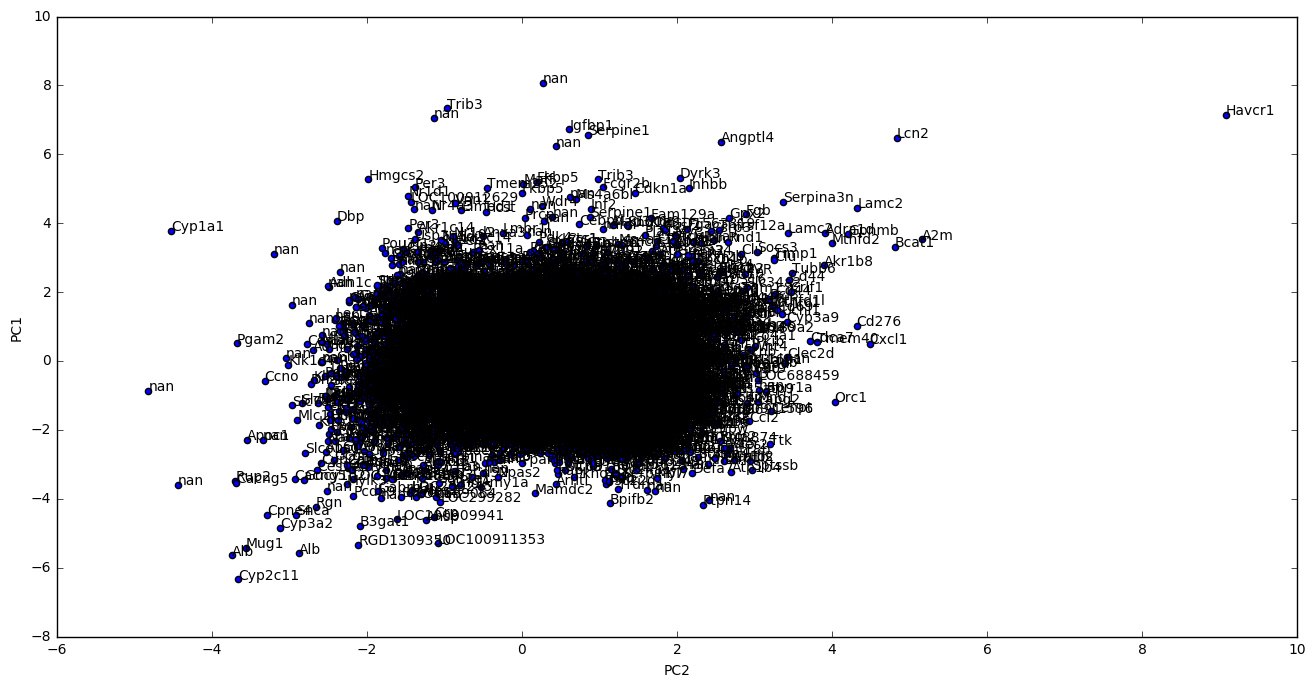

In [12]:
%matplotlib inline

ax = DM_kidney1_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, Drug in enumerate(DM_kidney1.index):
    ax.annotate(Drug, (DM_kidney1_2d.iloc[i].PC2, DM_kidney1_2d.iloc[i].PC1))

Additionally we can create a bubble chart to visualize the mean value for all the side effects of a particular drug corresponding to point size. First we'll add a new column containing the scaled mean per drug across all the side effects.

In [13]:
from sklearn.preprocessing import normalize

DM_kidney1_2d['Drug_mean'] = pd.Series(DM_kidney1.mean(axis=1), index=DM_kidney1_2d.index)
Drug_mean_max = DM_kidney1_2d['Drug_mean'].max()
Drug_mean_min = DM_kidney1_2d['Drug_mean'].min()
Drug_mean_scaled = (DM_kidney1_2d.Drug_mean-Drug_mean_min) / Drug_mean_max
DM_kidney1_2d['Drug_mean_scaled'] = pd.Series(
    Drug_mean_scaled, 
    index=DM_kidney1_2d.index)
DM_kidney1_2d.head()

,PC1,PC2,Drug_mean,Drug_mean_scaled
Gene,,,,
Sumo2,0.418507,0.047258,0.011611,0.817915
Cdc37,0.133438,0.178638,0.000227,0.787837
Copb2,0.358359,-0.170280,0.006293,0.803864
Vcp,0.569861,-0.173709,0.017192,0.832660
Ube2d2,0.394094,-0.157287,0.010973,0.816228


Now we can plot using variable size, omitting Drug name.

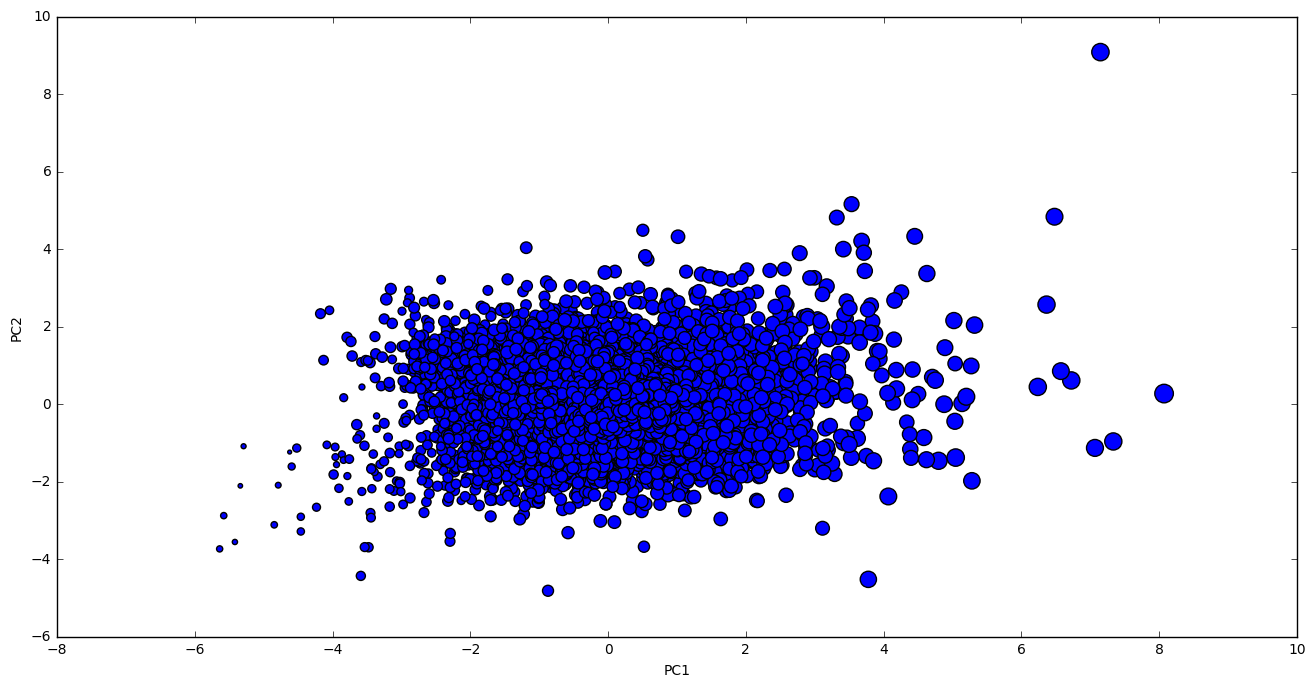

In [14]:
DM_kidney1_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_kidney1_2d['Drug_mean_scaled']*100, figsize=(16,8))

We can also do the same with the sum as opposed to the mean to compare.

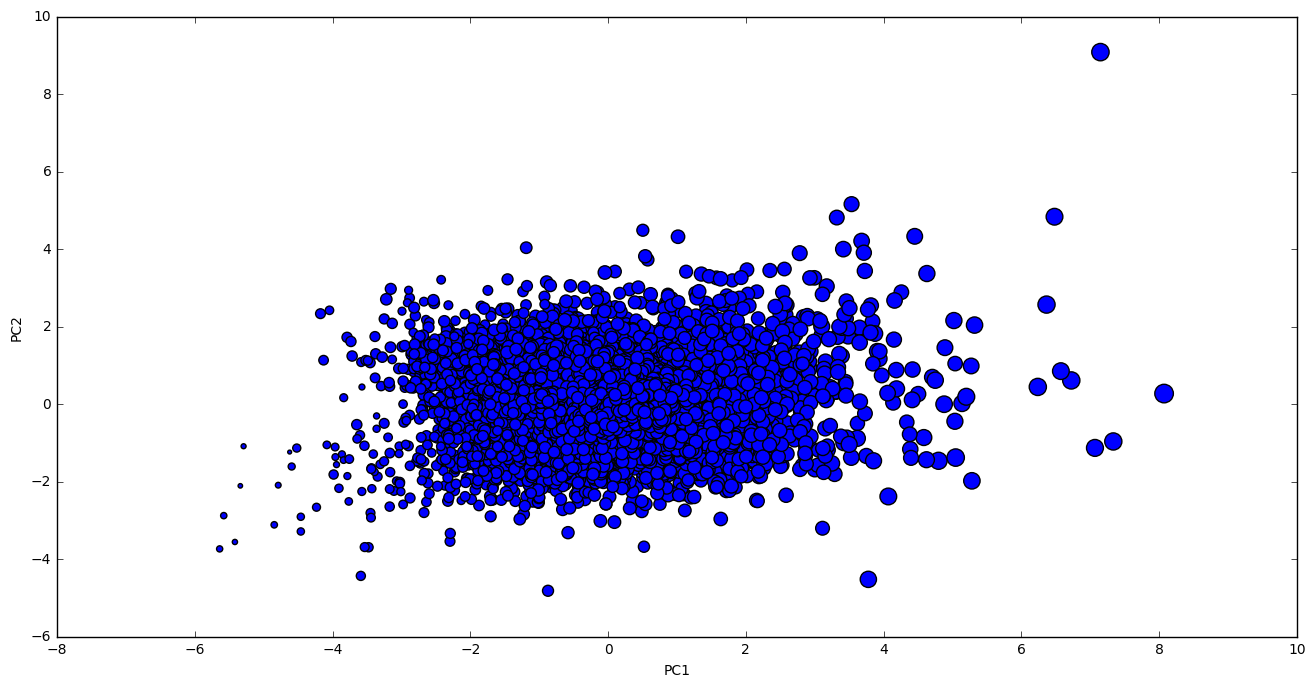

In [15]:
from sklearn.preprocessing import normalize

DM_kidney1_2d['Drug_sum'] = pd.Series(DM_kidney1.sum(axis=1), index=DM_kidney1_2d.index)
Drug_sum_max = DM_kidney1_2d['Drug_sum'].max()
Drug_sum_min = DM_kidney1_2d['Drug_sum'].min()
Drug_sum_scaled = (DM_kidney1_2d.Drug_sum-Drug_sum_min) / Drug_sum_max
DM_kidney1_2d['Drug_sum_scaled'] = pd.Series(
    Drug_sum_scaled, 
    index=DM_kidney1_2d.index)
DM_kidney1_2d.head()
DM_kidney1_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_kidney1_2d['Drug_sum_scaled']*100, figsize=(16,8))

From this preliminary data, we can see that there is not much variation overall, but most of it is along the x-axis, which corresponds to our first principal component. Unfortunately, with 364 features (drugs) within the data of 31,040 samples (genes), this first principal component only comprises ~20% of the variance. Combined with the second principal component (~3%) we still only account for about ~23% of the variance using these two components. So let's look at a few more components and see if we can capture a majority of the variance:

In [16]:
pca1 = PCA(n_components=4)
pca1.fit(DM_kidney1)
print(pca1.explained_variance_ratio_)

[ 0.07575882  0.04512361  0.03881731  0.02120372]


At four components, we capture ~28% of the variance...

In [17]:
pca1 = PCA(n_components=8)
pca1.fit(DM_kidney1)
print(pca1.explained_variance_ratio_)

[ 0.07575882  0.04512361  0.03881731  0.02120372  0.0169856   0.01495163
  0.01434693  0.01336819]


...And at 8 components we capture ~35% of the variance. So in this case, because there is not much variability within the data, we would be better served to use more principal components to accurately reduce the dimensionality of this dataset from 364 to 8. Alternatively, we can update the dataset with more data  or take out multiple drug dosages and then be able to capture more variability with less dimensions.

We can visualize both the individual explained variance ratio of each principal component, as well as the cumulative variance ratio as follows:

In [18]:
import matplotlib.pyplot as plt

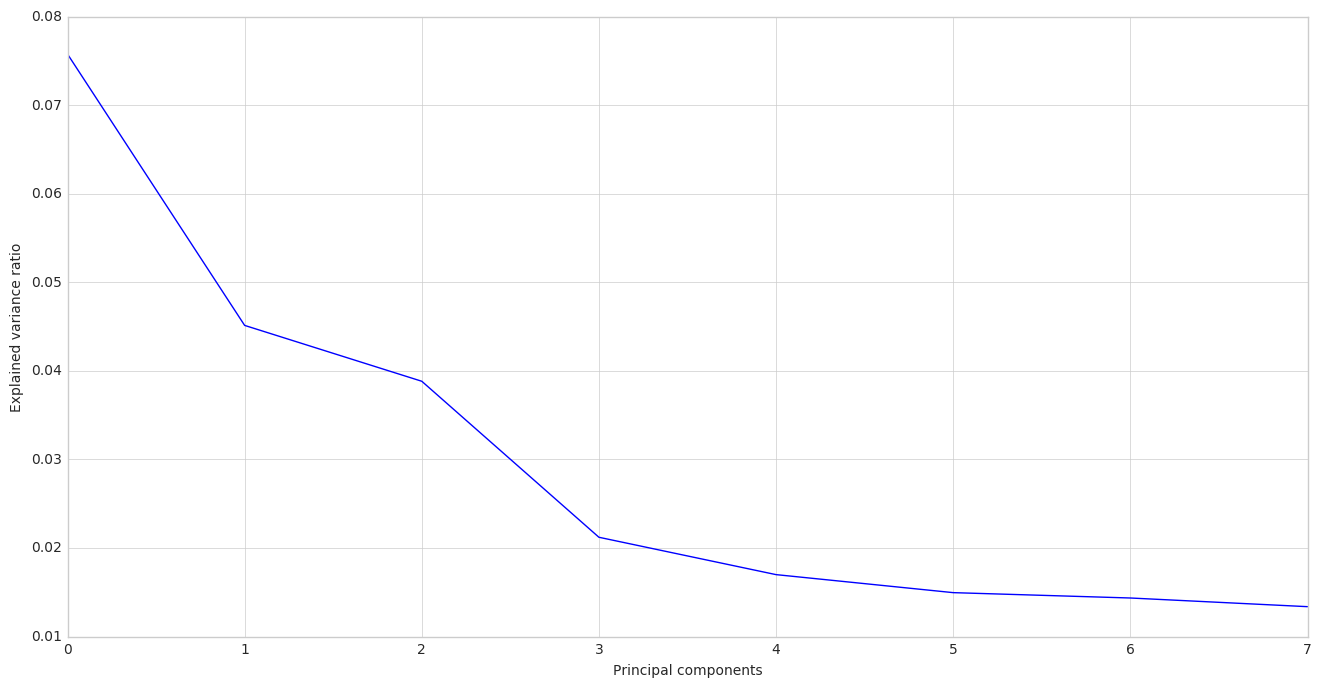

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca1.explained_variance_ratio_);

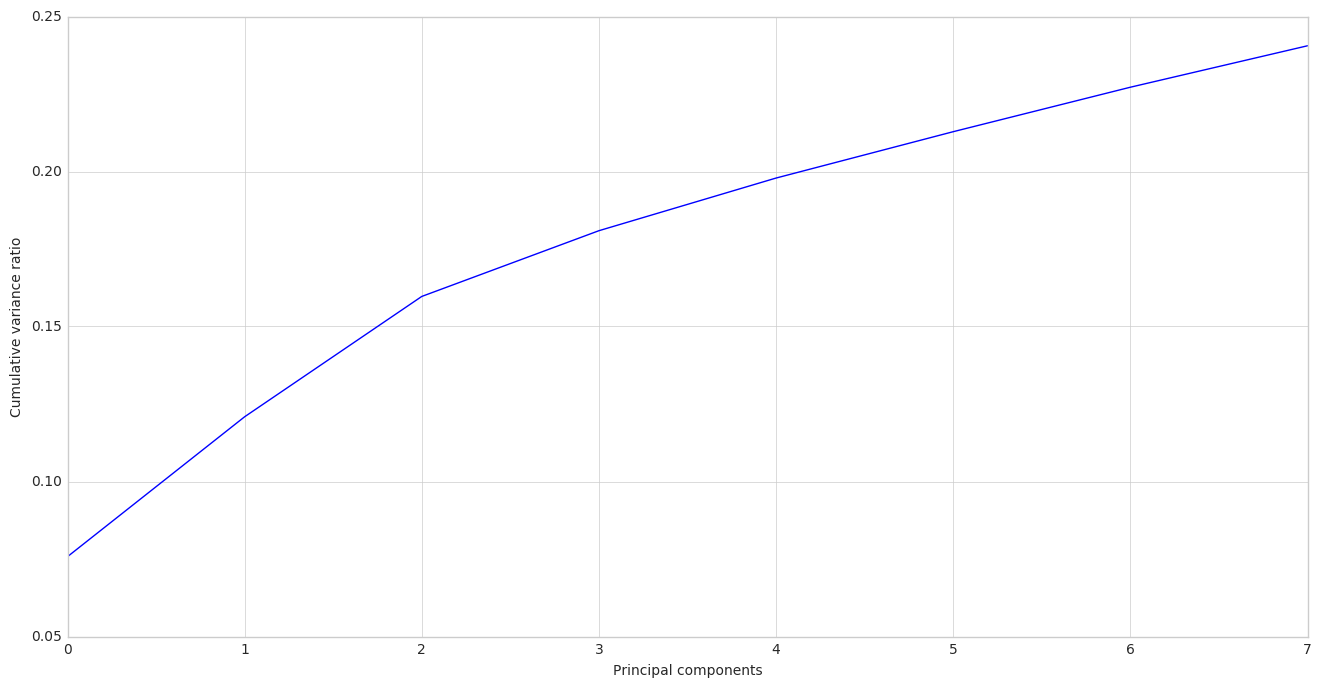

In [20]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Cumulative variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca1.explained_variance_ratio_.cumsum());

## Plotting the Data (DM_kidney2)

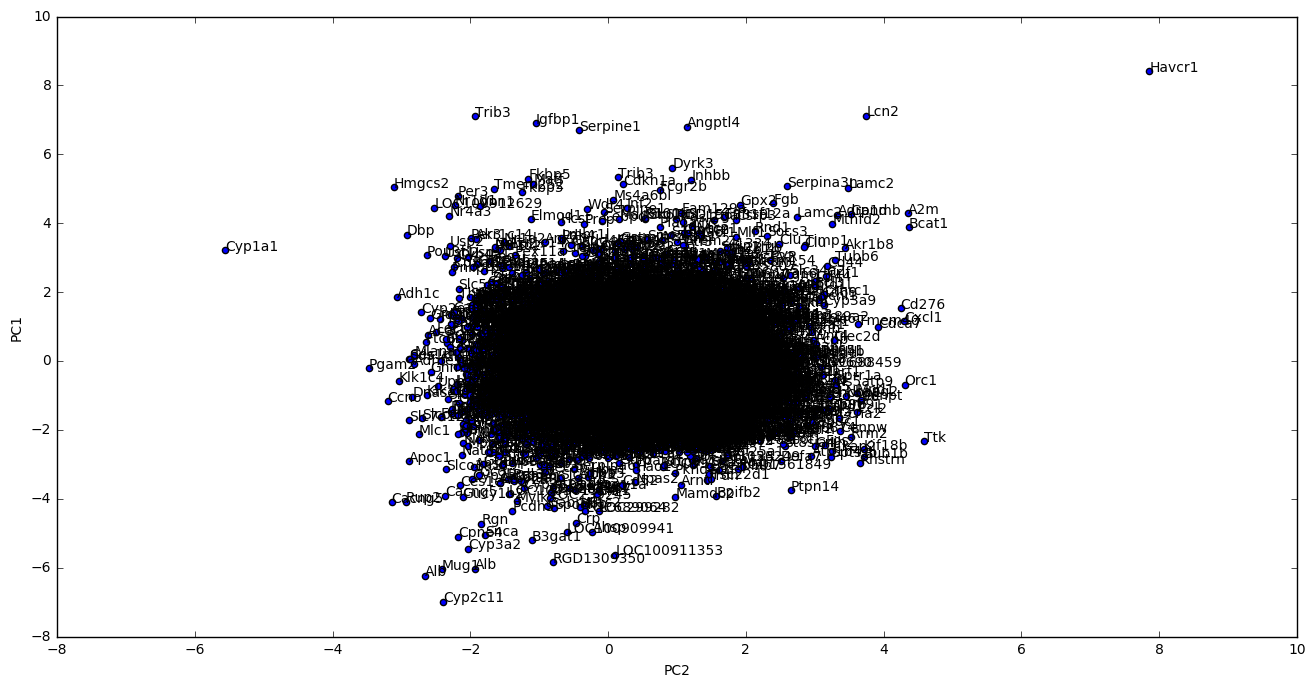

In [21]:
%matplotlib inline

ax = DM_kidney2_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, Drug in enumerate(DM_kidney2.index):
    ax.annotate(Drug, (DM_kidney2_2d.iloc[i].PC2, DM_kidney2_2d.iloc[i].PC1))

In [22]:
DM_kidney2_2d['Drug_mean'] = pd.Series(DM_kidney2.mean(axis=1), index=DM_kidney2_2d.index)
Drug_mean_max = DM_kidney2_2d['Drug_mean'].max()
Drug_mean_min = DM_kidney2_2d['Drug_mean'].min()
Drug_mean_scaled = (DM_kidney2_2d.Drug_mean-Drug_mean_min) / Drug_mean_max
DM_kidney2_2d['Drug_mean_scaled'] = pd.Series(
    Drug_mean_scaled, 
    index=DM_kidney2_2d.index)
DM_kidney2_2d.head()

,PC1,PC2,Drug_mean,Drug_mean_scaled
Gene,,,,
Sumo2,0.360020,0.015499,0.011611,1.045894
Cdc37,0.096920,0.180971,0.000227,1.007433
Copb2,0.264387,-0.181745,0.006293,1.027927
Vcp,0.486860,-0.250120,0.017192,1.064749
Ube2d2,0.316450,-0.210956,0.010973,1.043737


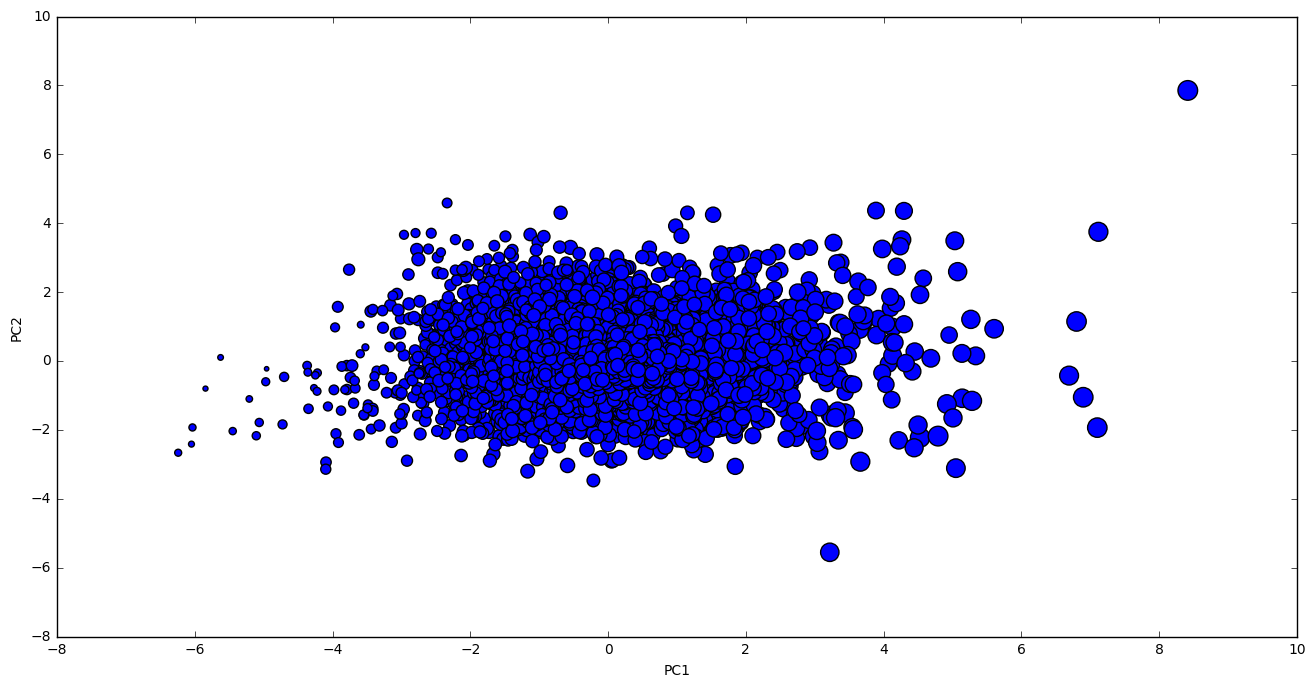

In [23]:
DM_kidney2_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_kidney2_2d['Drug_mean_scaled']*100, figsize=(16,8))

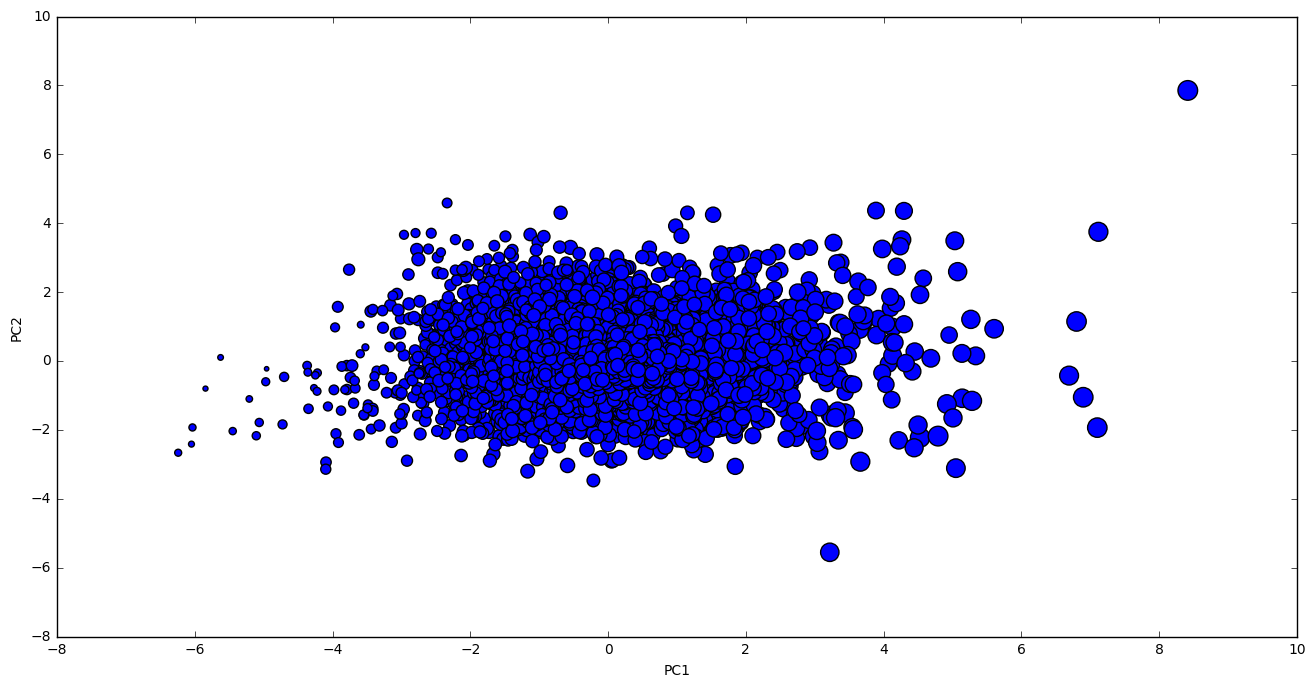

In [24]:
DM_kidney2_2d['Drug_sum'] = pd.Series(DM_kidney2.sum(axis=1), index=DM_kidney2_2d.index)
Drug_sum_max = DM_kidney2_2d['Drug_sum'].max()
Drug_sum_min = DM_kidney2_2d['Drug_sum'].min()
Drug_sum_scaled = (DM_kidney2_2d.Drug_sum-Drug_sum_min) / Drug_sum_max
DM_kidney2_2d['Drug_sum_scaled'] = pd.Series(
    Drug_sum_scaled, 
    index=DM_kidney2_2d.index)
DM_kidney2_2d.head()
DM_kidney2_2d.plot(kind='scatter', x='PC1', y='PC2', s=DM_kidney2_2d['Drug_sum_scaled']*100, figsize=(16,8))

In [25]:
pca2 = PCA(n_components=4)
pca2.fit(DM_kidney2)
print(pca2.explained_variance_ratio_)

[ 0.08397944  0.0528219   0.04146376  0.02320129]


In [26]:
pca2 = PCA(n_components=8)
pca2.fit(DM_kidney2)
print(pca2.explained_variance_ratio_)

[ 0.08397944  0.0528219   0.04146376  0.02320129  0.0186734   0.01617017
  0.01448011  0.01379865]


### Though the plots look similar, the explained variance ration slightly increased with ~7,000 less genes that were not annotated in DrugMatrix's database.

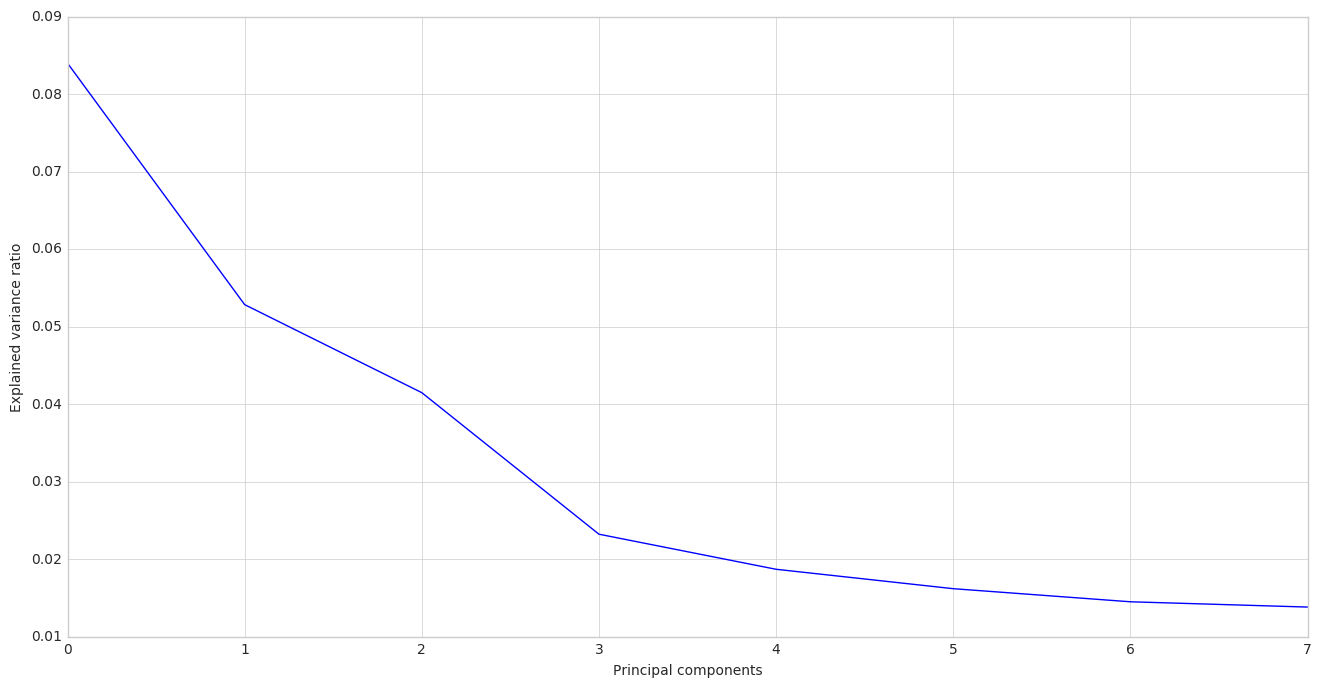

In [27]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca2.explained_variance_ratio_);

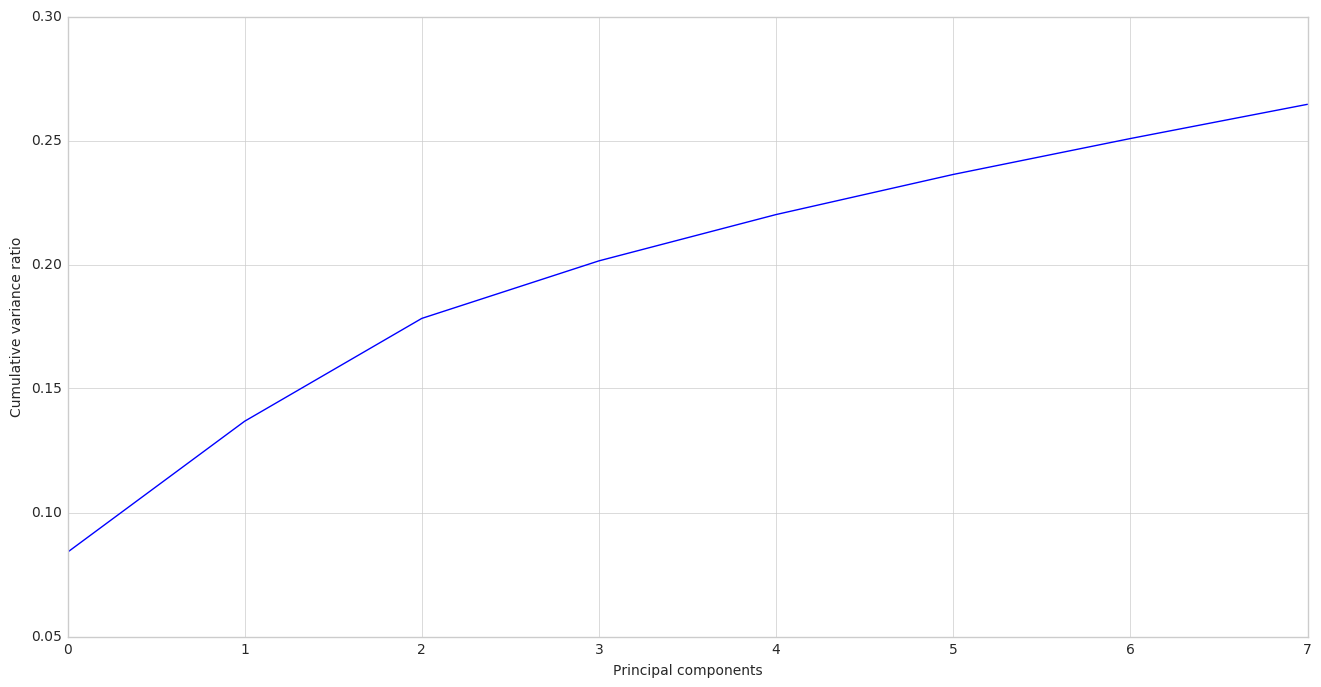

In [28]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 8));
    plt.ylabel('Cumulative variance ratio')
    plt.xlabel('Principal components')
    plt.plot(pca2.explained_variance_ratio_.cumsum());